In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("ecodata.csv")

df

,id,city_id,location_id,camera_id,co,no2,so2,o3,pm25,pm10,temp,hum,time,ver,lat,lon,created
0,15,2,2,420,14.6,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,-1,43.238362,76.889989,2022-11-26 09:17:33
1,15,2,2,420,14.6,0,0,0.52,42,45,-0.13,98.01,2022-11-26 15:17:58,-1,43.238362,76.889989,2022-11-26 09:17:31
2,15,2,2,420,14.6,0,0,0.51,42,45,-0.14,98.01,2022-11-26 15:17:56,-1,43.238362,76.889989,2022-11-26 09:17:29
3,15,2,2,420,14.5,0,0,0.51,42,45,-0.13,98.02,2022-11-26 15:17:54,-1,43.238362,76.889989,2022-11-26 09:17:27
4,15,2,2,420,14.5,0,0,0.50,42,45,-0.12,98.03,2022-11-26 15:17:52,-1,43.238362,76.889989,2022-11-26 09:17:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15,2,2,420,14.3,0,0,0.45,16,17,-0.17,97.46,2022-11-26 14:43:50,-1,43.238362,76.889989,2022-11-26 08:43:23
996,15,2,2,420,14.3,0,0,0.45,16,17,-0.17,97.48,2022-11-26 14:43:49,-1,43.238362,76.889989,2022-11-26 08:43:21
997,15,2,2,420,14.3,0,0,0.45,16,17,-0.16,97.50,2022-11-26 14:43:46,-1,43.238362,76.889989,2022-11-26 08:43:19
998,15,2,2,420,14.3,0,0,0.45,16,17,-0.17,97.52,2022-11-26 14:43:45,-1,43.238362,76.889989,2022-11-26 08:43:17


In [5]:
time = df["time"].tolist()

time = [pd.Timestamp(item) for item in time]

co = df["co"].tolist() 
no2 = df["no2"].tolist() 
so2 = df["so2"].tolist() 
o3 = df["o3"].tolist() 
pm25 = df["pm25"].tolist() 
pm10 = df["pm10"].tolist() 
temp = df["temp"].tolist() 
hum = df["hum"].tolist() 


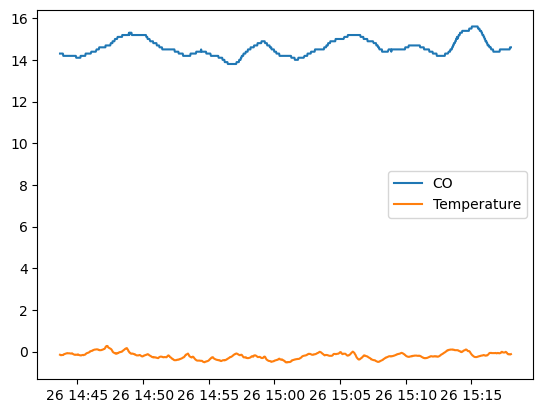

In [6]:
import matplotlib.pyplot as plt


plt.plot(time, co, label="CO")
plt.plot(time, temp, label="Temperature")

plt.legend()
plt.show()

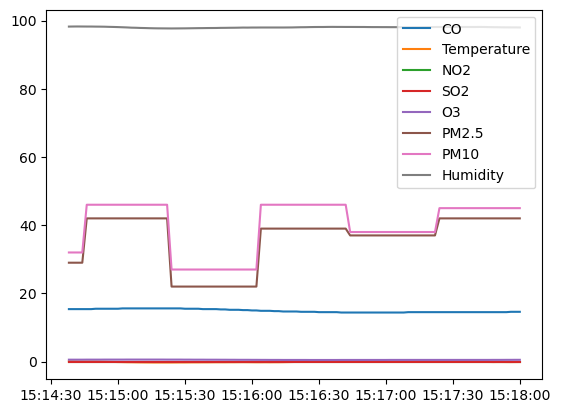

In [7]:
plt.plot(time[:100], co[:100], label="CO")
plt.plot(time[:100], temp[:100], label="Temperature")
plt.plot(time[:100], no2[:100], label="NO2")
plt.plot(time[:100], so2[:100], label="SO2")
plt.plot(time[:100], o3[:100], label="O3")
plt.plot(time[:100], pm25[:100], label="PM2.5")
plt.plot(time[:100], pm10[:100], label="PM10")
plt.plot(time[:100], hum[:100], label="Humidity")

plt.legend()
plt.show()

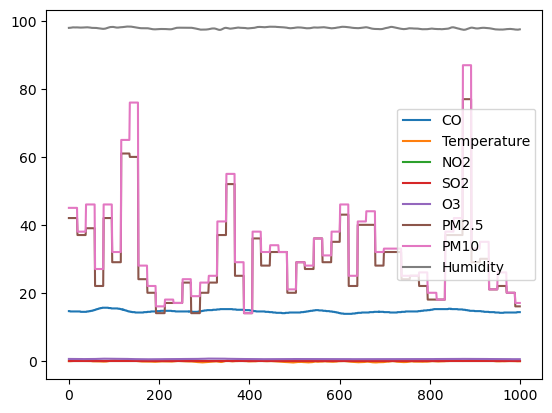

In [8]:
ind = range(len(time))

plt.plot(ind, co, label="CO")
plt.plot(ind, temp, label="Temperature")
plt.plot(ind, no2, label="NO2")
plt.plot(ind, so2, label="SO2")
plt.plot(ind, o3, label="O3")
plt.plot(ind, pm25, label="PM2.5")
plt.plot(ind, pm10, label="PM10")
plt.plot(ind, hum, label="Humidity")

plt.legend()
plt.show()

In [9]:
lst = []

for item_pm in pm25:
    if pm25[item_pm - 1] != pm25[item_pm]:
        lst.append(pm25[item_pm])
            
count_len = len(lst)
print(f"{count_len * 2} seconds - the delay for PM 2.5 estimating")

38 seconds - the delay for PM 2.5 estimating


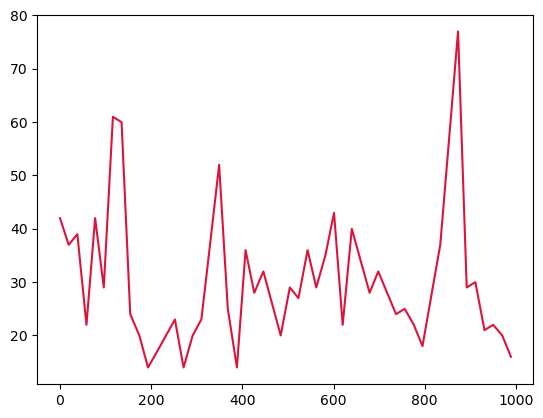

In [10]:
pm25 = df["pm25"].tolist() 

pm_back = pm25[0]
filter_pm = []
filter_time = []
filter_pm.append(pm25[0])
filter_time.append(ind[0])

for i in range(len(pm25)):
    if pm25[i] != pm_back:
        filter_pm.append(pm25[i])
        filter_time.append(ind[i])
        pm_back = pm25[i]

plt.plot(filter_time, filter_pm, color = "crimson", label="PM2.5")

plt.show()

In [11]:
differenced = [time[i]-time[i+1] for i in range(len(time)-1)]

differenced_in_seconds = []

for i in range(len(differenced)-1):
    differenced_in_seconds.append(differenced[i].total_seconds())

In [12]:
counter = [{i: differenced_in_seconds.count(i)} for i in set(differenced_in_seconds)]
counter_list = list(counter)
print(counter_list)

[{1.0: 61}, {2.0: 844}, {3.0: 66}, {4.0: 27}]


In [68]:
from datetime import datetime

epoch_time = datetime(1970, 1, 1)

delta_list = []

for item in time:
    delta = item - epoch_time
    delta_list.append(delta.total_seconds())

delta_list = delta_list[::-1]

print(delta_list[:10])

[1669473822.0, 1669473825.0, 1669473826.0, 1669473829.0, 1669473830.0, 1669473833.0, 1669473835.0, 1669473837.0, 1669473838.0, 1669473841.0]


In [69]:
diff_delta = [delta_list[i + 1] - delta_list[i] for item in range(len(delta_list))]

In [70]:
print(delta_list[:10])

print(diff_delta[:10])

[1669473822.0, 1669473825.0, 1669473826.0, 1669473829.0, 1669473830.0, 1669473833.0, 1669473835.0, 1669473837.0, 1669473838.0, 1669473841.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
